# Introduction
This notebook is a part of a series of notebooks.
1. Data Cleaning
2. ***Data Analysis***
3. Sentiment Analysis
4. Topic Modelling  

The purpose of this notebook is to analyse the data to see how the coverage of Covid-19 has changed over time. The expected outcome of this data analysis is to get a better understanding of the data and draw some subconclusions.

# Problem statement
How has the mainstream media's coverage of Covid-19 changed during the pandemic?
- Can an overall change in sentiment be seen?
- Has the topics changed over time?
- Can a change in positivity og negativity within publishers be seen?

[Link to Github repository](https://github.com/miguel2650/covid-19-research)

In [6]:
import os.path
import pandas as pd
# Make sure that the pickle directory exists, otherwise create it
if not os.path.exists("pickle/"):
    !mkdir 'pickle'
# Read the raw data from pickle file into dataframe.
data_df = pd.read_pickle('pickle/data_df.pkl')
# Read the cleaned data from pickle file into dataframe.
data_clean = pd.read_pickle('pickle/data_clean_r4.pkl')

In [2]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer
import pickle

# CountVectorizer will create a matrix of how many times each word has been mentioned.
# The stop_words parameter will remove uninformative words such as 'him','her','the'.
cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean.content)

# Creating a new dataframe where columns is the newly found feature names.
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
# Saving the dataframe as a pickle file.
data_dtm.to_pickle('pickle/data_dtm.pkl')
pickle.dump(cv, open("cv_stop.pkl", "wb"))

,aa,aal,aam,aba,aback,abacus,abalone,abandon,abandoned,abandonment,...,zoonosis,zoonotic,zorro,zoster,zowie,zucchini,zwanziger,zygomatic,αcoronavirus,βcoronavirus
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55532,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55533,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55534,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55535,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Setting the features as index and the index as columns.
data_dtm = data_dtm.transpose()
data_dtm.head(3)

,0,1,2,3,4,5,6,7,8,9,...,55527,55528,55529,55530,55531,55532,55533,55534,55535,55536
aa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aal,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aam,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# Find the top 30 words mentioned in each article
top_dict = {}
for c in data_dtm.iloc[:0].columns:
    top = data_dtm[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

In [16]:
# Example of first sample from the top 30 list of mentioned words.
dict(list(top_dict.items())[0:1])

{0: [('cancer', 15),
  ('time', 7),
  ('didnt', 5),
  ('day', 5),
  ('life', 5),
  ('like', 5),
  ('story', 4),
  ('continued', 4),
  ('treatment', 4),
  ('diagnosis', 4),
  ('doctor', 4),
  ('recovery', 4),
  ('second', 4),
  ('lot', 4),
  ('round', 4),
  ('thought', 3),
  ('knew', 3),
  ('longer', 3),
  ('live', 3),
  ('need', 3),
  ('just', 3),
  ('surgeon', 3),
  ('surgery', 3),
  ('tell', 3),
  ('feeling', 3),
  ('received', 3),
  ('told', 3),
  ('god', 3),
  ('ovarian', 2),
  ('win', 2)]}

In [17]:
# Get a dict of top 30 word with a total count of them appering in all articles
top_words_top_30 = {}
for k,v in top_dict.items():
    for word_count in v:
        key = word_count[0]
        value = word_count[1]
        if key not in top_words_top_30:
            top_words_top_30[key] = value
        else:
            top_words_top_30[key] += value
            
word_count = {k: v for k, v in sorted(top_words_top_30.items(), key=lambda item: item[1], reverse=True)}

In [20]:
from wordcloud import WordCloud

# Top 30 word visualised as word cloud
cloud = WordCloud(background_color="white", max_words=30)
cloud.fit_words(top_words_top_30)
cloud.to_file("word_cloud.png")

![Top 30 Words](word_cloud.png)

In [22]:
# Top 30 words of each article joined with date and grouped by week number with sum of the appearance of the words.
data_dtm_top_30 = data_dtm.transpose()[list(word_count)[:30]]
data_dtm_top_30_date = data_dtm_top_30.join(data_df.date)
data_dtm_top_30_date.date = pd.to_datetime(data_dtm_top_30_date.date).dt.strftime('%W')
data_dtm_top_30_date = data_dtm_top_30_date.groupby('date', as_index=False, sort=False).sum()

In [29]:
# Data will be structured as 18 weeks (18 samples), and 30 words (30 features).
# Example of first 5 samples.
data_dtm_top_30_date.head(5)

,date,said,coronavirus,people,new,health,time,virus,day,government,...,just,work,like,public,market,march,crisis,financial,global,business
0,00,2,0,5,0,10,9,1,7,0,...,3,2,6,0,0,0,0,0,0,0
1,01,16,9,52,7,39,6,12,14,2,...,0,9,3,5,2,0,0,0,9,1
2,02,49,26,23,41,51,4,38,7,3,...,1,2,4,12,9,0,4,0,10,0
3,03,1642,1392,1253,931,1098,288,1435,389,240,...,203,100,180,437,372,23,107,67,361,63
4,04,3678,2936,1731,1366,1858,740,2042,881,603,...,437,327,381,558,739,162,170,279,897,350


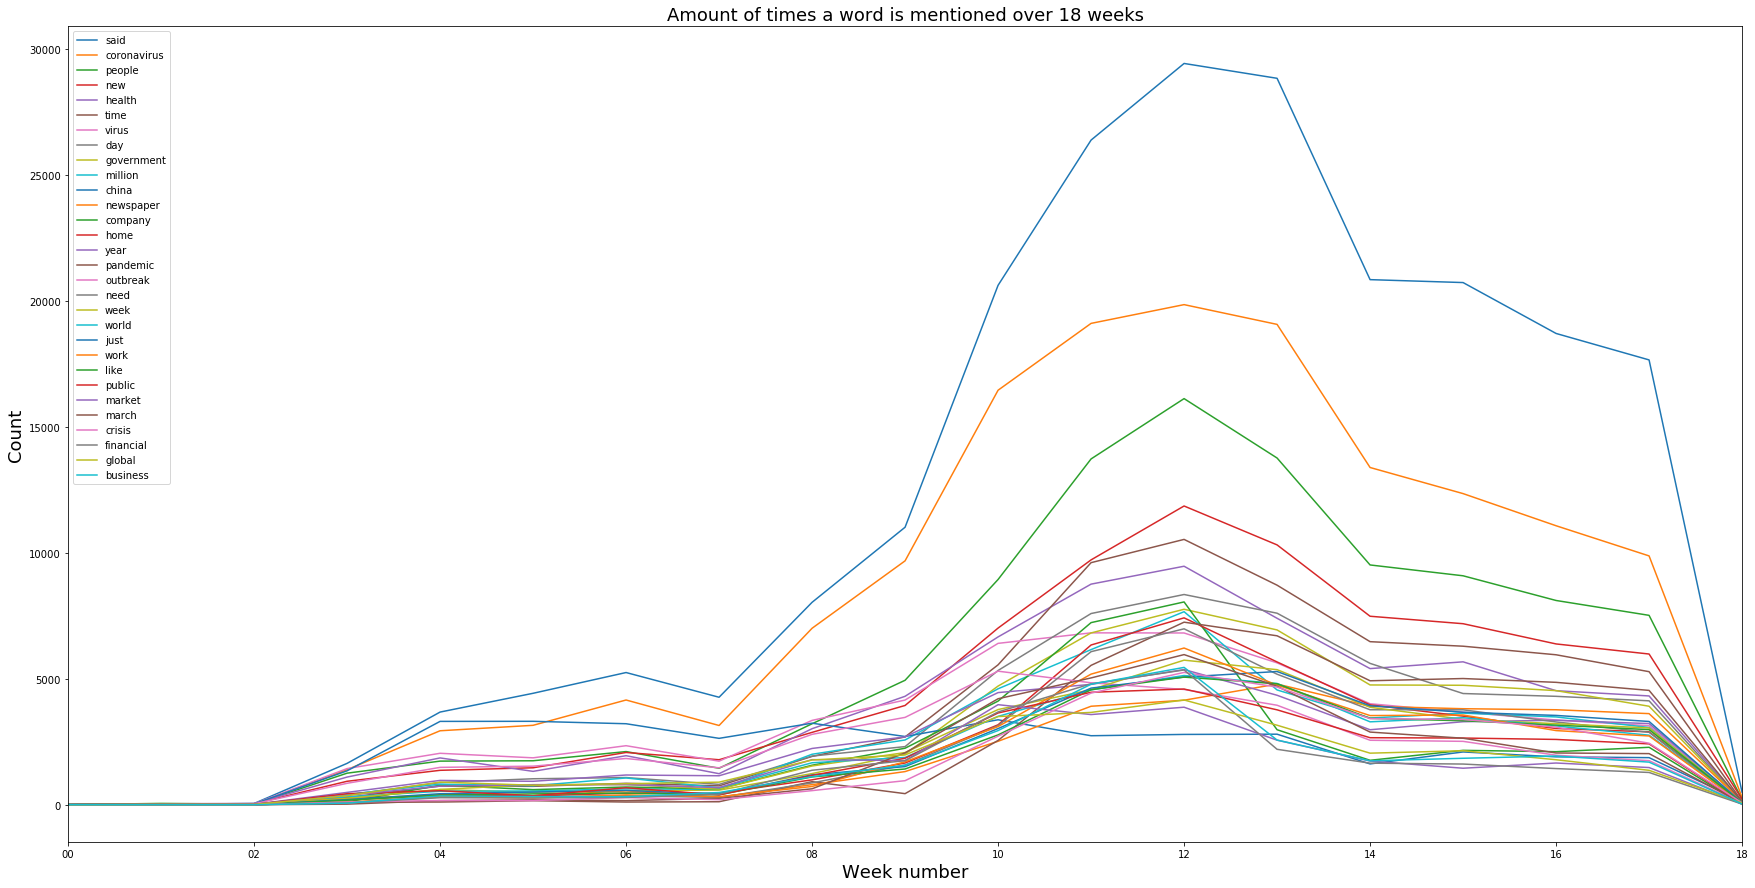

In [33]:
import matplotlib.pyplot as plt
# Visualization of how many times a word is counted over 18 weeks.
data_dtm_top_30_date.plot(kind='line',x='date', figsize=(30,15))
plt.title("Amount of times a word is mentioned over 18 weeks", size=18)
plt.xlabel("Week number", size=18)
plt.ylabel("Count", size=18)
plt.show()

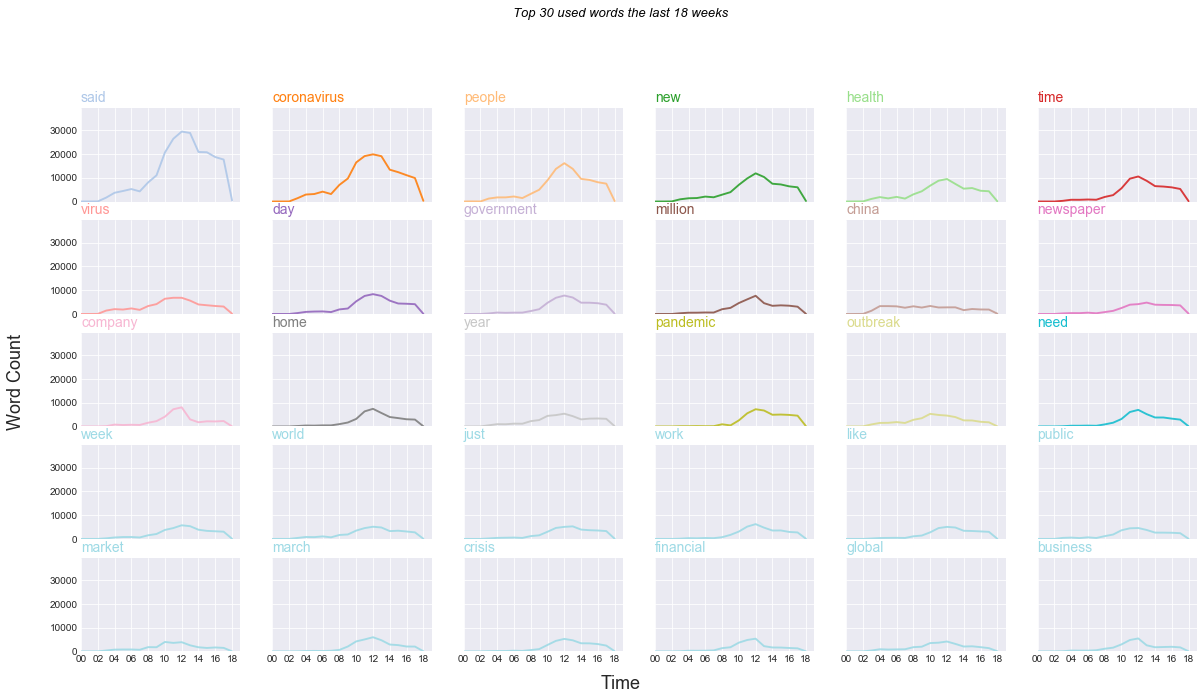

In [35]:
# Background grid for the plots
plt.style.use("seaborn-darkgrid")
# Color the the plots text and line.
palette = plt.get_cmap("tab20")

# Multi line plot
num = 0
# This must be before the loop in order to make the whole plot bigger and not just the individual subplots.
fig = plt.figure(figsize=(20,10))

for column in data_dtm_top_30_date.drop("date", axis=1):
    # Counter for nubmer of plot
    num+=1
    
    # The spot for the small plot inside the big plot
    plt.subplot(5,6, num)
    # Plot the line
    plt.plot(data_dtm_top_30_date["date"], data_dtm_top_30_date[column], marker="", color=palette(num), linewidth=1.9, alpha=0.9, label=column)
    #plt.xticks(data_dtm_top_30_date["date"],labels=("Jan", "Feb", "Mar", "Apr", "May"))
    plt.xticks(data_dtm_top_30_date['date'][::2])
    # Set limits
    plt.xlim(0,len(data_dtm_top_30_date.index))
    plt.ylim(-2,data_dtm_top_30_date.iloc[:,1].max()+10000)
    
    # By default all plots got their own legend ticks, removing those
    if num in range(25):
        plt.tick_params(labelbottom=False)
    if num not in [1,7,13,19,25]:
        plt.tick_params(labelleft=False)
    
    # The title
    plt.title(column, loc="left", fontsize=14, fontweight=10, color=palette(num))
    
# general title
plt.suptitle("Top 30 used words the last 18 weeks", fontsize=13, fontweight=0, color='black', style='italic', y=1.02)

# Axis title
fig.text(0.5, 0.08,"Time",fontsize=18, ha="center", va="center")
fig.text(0.08, 0.5, "Word Count", fontsize=18, ha="center", va="center", rotation="vertical")


plt.show()

# Evaluation
By inspecting the data and plots above it is clear to see what words has been used the most. Some of the words is more informative than others.
There is a common trend among all the words beginning at week 8. The COVID-19 lockdown was initiated around 12/03/2020 (week 11). The amount of times a word is mentioned is peaking around this time because of the amount of acticles being posted and the trending news around that time seems to be COVID-19 related words.  
Therefore, it can be seen that there is an increase in what we believe is a COVID-19 related topic starting at the time of the Corona outbreak.

In [36]:
# Top 30 words of each article joined with domain and grouped by domain with sum of the appearance 
# of the words and count of articles from the specific domain

data_dtm_top_30_domain = data_dtm_top_30.join(data_df.domain)

data_dtm_top_30_domain_count = data_dtm_top_30_domain.groupby('domain', as_index=False, sort=False).sum()
data_dtm_top_30_domain_count['domain count'] = data_dtm_top_30_domain_count.domain.map(data_dtm_top_30_domain.domain.value_counts())
data_dtm_top_30_domain_count.head()

,domain,said,coronavirus,people,new,health,time,virus,day,government,...,work,like,public,market,march,crisis,financial,global,business,domain count
0,medicalnewstoday,35,162,322,136,192,107,214,104,19,...,52,33,47,7,17,8,5,27,2,40
1,theguardian,40018,21142,27401,13201,15285,13402,10624,13315,13215,...,8444,7817,8363,1940,4585,7753,2814,3986,2920,8109
2,nature,159,881,1014,557,442,526,691,423,143,...,514,195,181,53,190,82,36,171,23,225
3,express,44138,54236,30575,16609,16541,21715,16523,15262,14486,...,9516,10033,8534,2408,5051,8385,3182,3389,2550,16484
4,cnbc,59443,32743,14602,18836,11903,9827,12702,10659,6202,...,5113,5383,4391,11086,7405,5191,5810,8700,5952,9757


In [37]:
data_dtm_top_30_domain_count[data_dtm_top_30.columns] = \
data_dtm_top_30_domain_count[data_dtm_top_30.columns].div(data_dtm_top_30_domain_count['domain count'], axis=0)
data_dtm_top_30_domain_count.head()

,domain,said,coronavirus,people,new,health,time,virus,day,government,...,work,like,public,market,march,crisis,financial,global,business,domain count
0,medicalnewstoday,0.875000,4.050000,8.050000,3.400000,4.800000,2.675000,5.350000,2.600000,0.475000,...,1.300000,0.825000,1.175000,0.175000,0.425000,0.200000,0.125000,0.675000,0.050000,40
1,theguardian,4.935010,2.607227,3.379085,1.627944,1.884943,1.652732,1.310149,1.642003,1.629671,...,1.041312,0.963991,1.031323,0.239240,0.565421,0.956098,0.347022,0.491553,0.360094,8109
2,nature,0.706667,3.915556,4.506667,2.475556,1.964444,2.337778,3.071111,1.880000,0.635556,...,2.284444,0.866667,0.804444,0.235556,0.844444,0.364444,0.160000,0.760000,0.102222,225
3,express,2.677627,3.290221,1.854829,1.007583,1.003458,1.317338,1.002366,0.925868,0.878792,...,0.577287,0.608651,0.517714,0.146081,0.306418,0.508675,0.193036,0.205593,0.154695,16484
4,cnbc,6.092344,3.355847,1.496567,1.930511,1.219945,1.007174,1.301835,1.092446,0.635646,...,0.524034,0.551706,0.450036,1.136210,0.758942,0.532028,0.595470,0.891668,0.610024,9757
